## Introduction to hypothesis testing


### Generating a permutation sample
In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

In [42]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

### Visualizing permutation sampling
To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

In [46]:
#import pandas as pd 
url = 'https://assets.datacamp.com/production/repositories/470/datasets/129cba08c45749a82701fbe02180c5b69eb9adaf/sheffield_weather_station.csv'
rainfall_data = pd.read_csv(url, header=8,  sep='\s+')
#display(rainfall_data.head())
rainfall = rainfall_data[['rain', 'mm']]
rain_june = rainfall[rainfall.mm == 6].rain
rain_november = rainfall[rainfall.mm == 11].rain

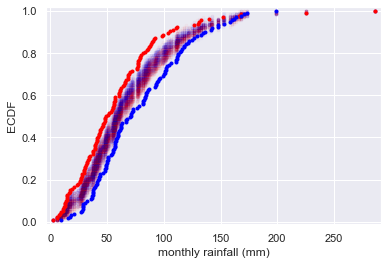

In [47]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)

_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

## Hypothesis test examples

In [ ]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates


def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

In [56]:
## Exploratory data analysis
# import pandas as pd 
url = 'https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv'
speed_of_light = pd.read_csv(url)
speed_of_light.head(1)
michelson_speed_of_light = speed_of_light['velocity of light in air (km/s)']

In [57]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [58]:
import numpy as np
newcomb_value = 299860 # km/s
michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcomb_value

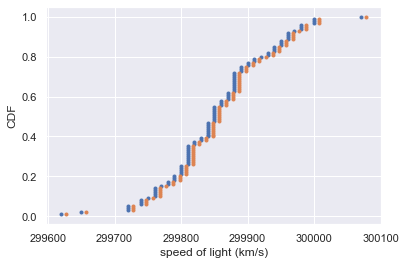

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x, y = ecdf(michelson_speed_of_light)
x_shifted, y_shifted = ecdf(michelson_shifted)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_shifted, y_shifted, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

In [60]:
print(np.mean(michelson_shifted))
print(np.mean(michelson_speed_of_light))

299860.0000000005
299852.4


In [61]:
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

In [62]:
diff_obs = diff_from_newcomb(michelson_speed_of_light)
diff_obs

-7.599999999976717

In [63]:
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / 10000
p_value

0.1715

In [64]:
bs_replicates

array([ 6.9, 10. , -3.4, ...,  6.9, -4.6, -2.2])

### Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis.

To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.

In [66]:
url = 'https://assets.datacamp.com/production/repositories/470/datasets/f1e7f8a98c18da5c60b625cb8af04c3217f4a5c3/female_literacy_fertility.csv' 
female_literacy_fertility = pd.read_csv(url)
display(female_literacy_fertility.head(3))

illiteracy = female_literacy_fertility['female literacy']
fertility = female_literacy_fertility['fertility']

Country  Continent  female literacy  fertility     population
0    Chine       ASI             90.5      1.769  1,324,655,000
1     Inde       ASI             50.8      2.682  1,139,964,932
2      USA       NAM             99.0      2.077    304,060,000

In [68]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(len(perm_replicates)):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates <=r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one.

#### Do neonicotinoid insecticides have unintended consequences?
As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).

In [74]:
url_bees = 'https://assets.datacamp.com/production/repositories/470/datasets/e427679d28d154934a6c087b2fa945bc7696db6d/bee_sperm.csv'
bee_sperm = pd.read_csv(url_bees, header = 3)
bee_sperm.tail()

Specimen  Treatment Environment  TreatmentNCSS Sample ID  Colony  Cage  \
230       151  Pesticide        Cage              2   P84-3-4      84    28   
231       152  Pesticide        Cage              2   P84-3-5      84    28   
232       153  Pesticide        Cage              2   P84-3-6      84    28   
233       154  Pesticide        Cage              2   P84-3-7      84    28   
234       155  Pesticide        Cage              2   P84-3-8      84    28   

     Sample  Sperm Volume per 500 ul  Quantity ViabilityRaw (%)    Quality  \
230       4                  3500000   3500000       88.2474712  88.247471   
231       5                  2287500   2287500                0   0.000000   
232       6                  2037500   2037500      89.91779766  89.917798   
233       7                  1362500   1362500      86.33333333  86.333333   
234       8                   912500    912500       83.9286198  83.928620   

     Age (d)  Infertil  AliveSperm  Quantity Millions  Alive Sperm Millions  \
230       14         0     3088661             3.5000              3.088661   
231       14         0           0             2.2875              0.000000   
232       14         0     1832075             2.0375              1.832075   
233       14         0     1176291             1.3625              1.176291   
234       14         0      765848             0.9125              0.765848   

     Dead Sperm Millions  
230             0.411339  
231             2.287500  
232             0.205425  
233             0.186209  
234             0.146652

In [84]:
bee_sperm = bee_sperm[['Treatment', 'Quantity Millions']]
bee_sperm.head()

Treatment  Quantity Millions
0   Control             2.1500
1   Control             2.2875
2   Control             0.0875
3   Control             1.8750
4   Control             1.5875

In [99]:
control = bee_sperm[bee_sperm['Treatment'] == 'Control'].iloc[:,1] #.QuantityMillions
treated = bee_sperm[bee_sperm['Treatment'] == 'Pesticide'].iloc[:,1]

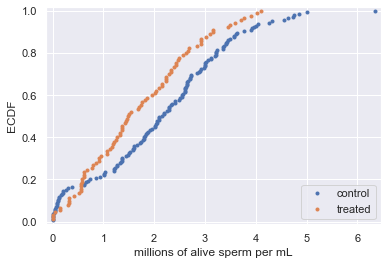

In [100]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

### Bootstrap hypothesis test on bee sperm counts
Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

In [101]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates